In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import transformers as ppb
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv(
    'train.tsv',
    delimiter='\t',
    header=None,
)

In [11]:
batch_1 = df[:2000]

In [12]:
batch_1[1].value_counts()

1
1    1041
0     959
Name: count, dtype: int64

In [13]:
model_class, tokenizer_class, pretrained_weights = (
    ppb.DistilBertModel,
    ppb.DistilBertTokenizer,
    'distilbert-base-uncased'
)

In [16]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [17]:
tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [18]:
tokenized[0]

[101,
 1037,
 18385,
 1010,
 6057,
 1998,
 2633,
 18276,
 2128,
 16603,
 1997,
 5053,
 1998,
 1996,
 6841,
 1998,
 5687,
 5469,
 3152,
 102]

In [19]:
batch_1[0][0]
    

'a stirring , funny and finally transporting re imagining of beauty and the beast and 1930s horror films'

In [20]:
tokenizer.encode(batch_1[0][0], add_special_tokens=True)

[101,
 1037,
 18385,
 1010,
 6057,
 1998,
 2633,
 18276,
 2128,
 16603,
 1997,
 5053,
 1998,
 1996,
 6841,
 1998,
 5687,
 5469,
 3152,
 102]

In [21]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
        
padded = np.array([(tokenlst + [0] * (max_len - len(tokenlst))) for tokenlst in tokenized])

In [22]:
padded.shape

(2000, 59)

In [23]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

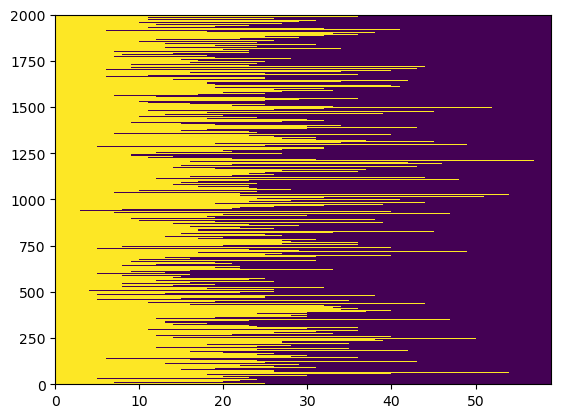

In [24]:
plt.pcolormesh(attention_mask)

In [25]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)
with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [26]:
features = last_hidden_states[0][:, 0, :].numpy();

In [27]:
labels = batch_1[1]

In [28]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [30]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

LogisticRegression()

In [31]:
lr_clf.score(test_features, test_labels)

0.828